### EDA With Google Play Store Dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
# find missing values from dataset
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Observation
- The dataset has missing values

In [6]:
df.shape

(10841, 13)

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.shape

(9360, 13)

In [9]:
# check duplicate values
df.duplicated().sum()

474

# Observation 
- There are 474 duplicate values are present in dataset

In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [12]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [13]:
df.Reviews = df.Reviews.astype(int)

In [14]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [15]:
df.Size = df.Size.apply(lambda m : m.replace('M','000') if m[-1] == 'M' else m.replace('k',''))

In [16]:
df['Size'] = df['Size'].str.replace('Varies with device' , str(np.nan))

In [17]:
df['Size'] = df['Size'].astype(float)

In [18]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [19]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [20]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [21]:
char_to_remove = ['+',',','$']
cols_to_clean = ['Installs','Price']
for char in char_to_remove:
    for col in cols_to_clean:
        df[col] = df[col].str.replace(char,'')

In [22]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

In [23]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [24]:
df['Installs'] = df['Installs'].astype(int)
df['Price'] = df['Price'].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   int64  
 4   Size            7418 non-null   float64
 5   Installs        8886 non-null   int64  
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   float64
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 971.9+ KB


In [26]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [27]:
df['Day'] = df['Last Updated'].dt.day
df['Month'] = df['Last Updated'].dt.month
df['year'] = df['Last Updated'].dt.year

In [28]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
Day                        int32
Month                      int32
year                       int32
dtype: object

# EDA

In [29]:
df.duplicated('App').sum()

696

# Observation 
- The dataset has still duplicate values

In [30]:
df = df.drop_duplicates(subset=['App'],keep='first')

In [31]:
df.duplicated('App').sum()

0

### Let's divide the dataset into two parts 1.Numerical Feature 2.categorical Feature

In [32]:
numerical_feature = [f for f in df.columns if df[f].dtype != 'O']
categorical_feature = [f for f in df.columns if df[f].dtype == 'O']
print('we have {} numerical_feature : {}'.format(len(numerical_feature),numerical_feature))
print('we have {} categorical_feature : {}'.format(len(categorical_feature),categorical_feature))

we have 9 numerical_feature : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'year']
we have 7 categorical_feature : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


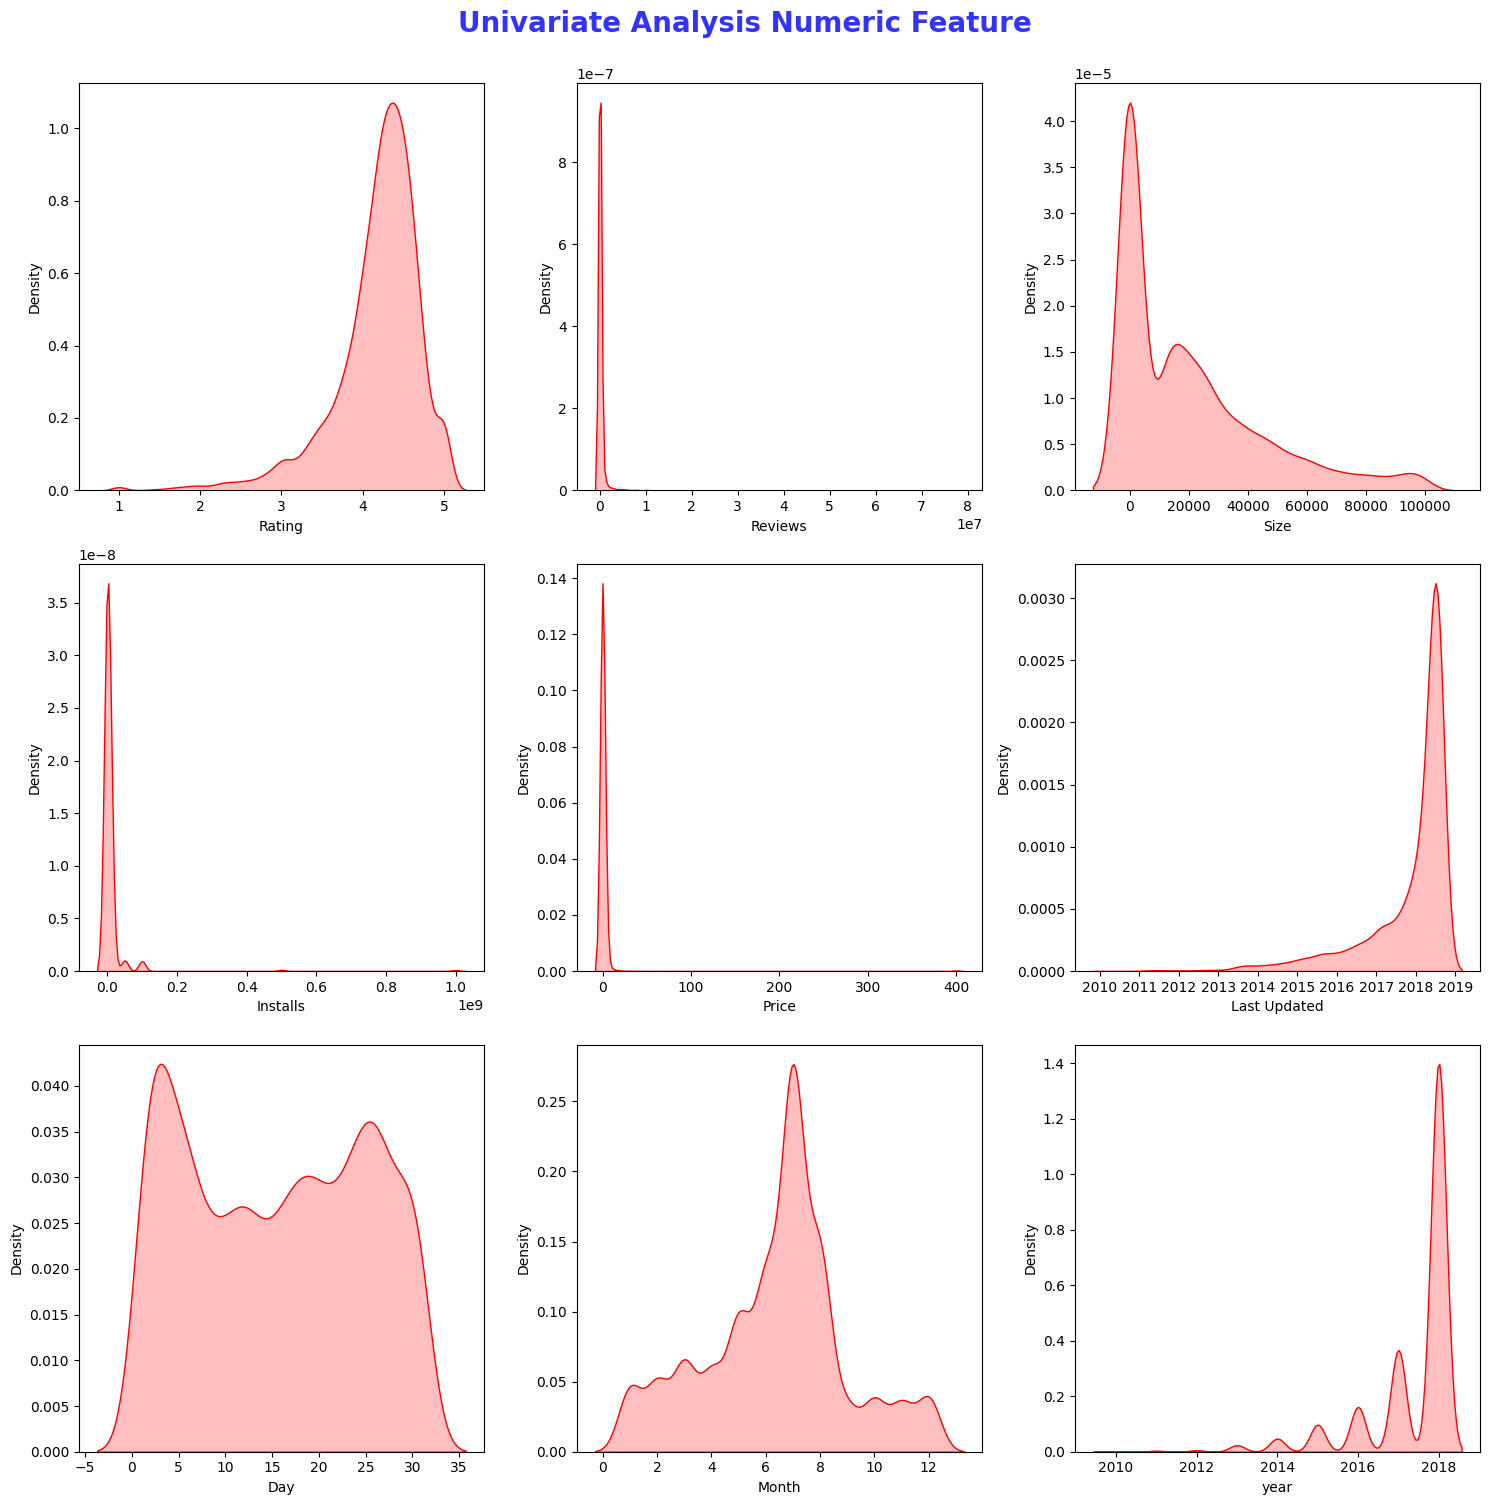

In [33]:
# Data Visualization on Numerical Features
plt.figure(figsize=(15,15))
ob = plt.suptitle('Univariate Analysis Numeric Feature', fontsize = 20 , fontweight = 'bold' , alpha = 0.8 , y = 1.)
ob.set_color('b')
for i in range(len(numerical_feature)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data = df[numerical_feature[i]] , shade = True , color = 'r')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

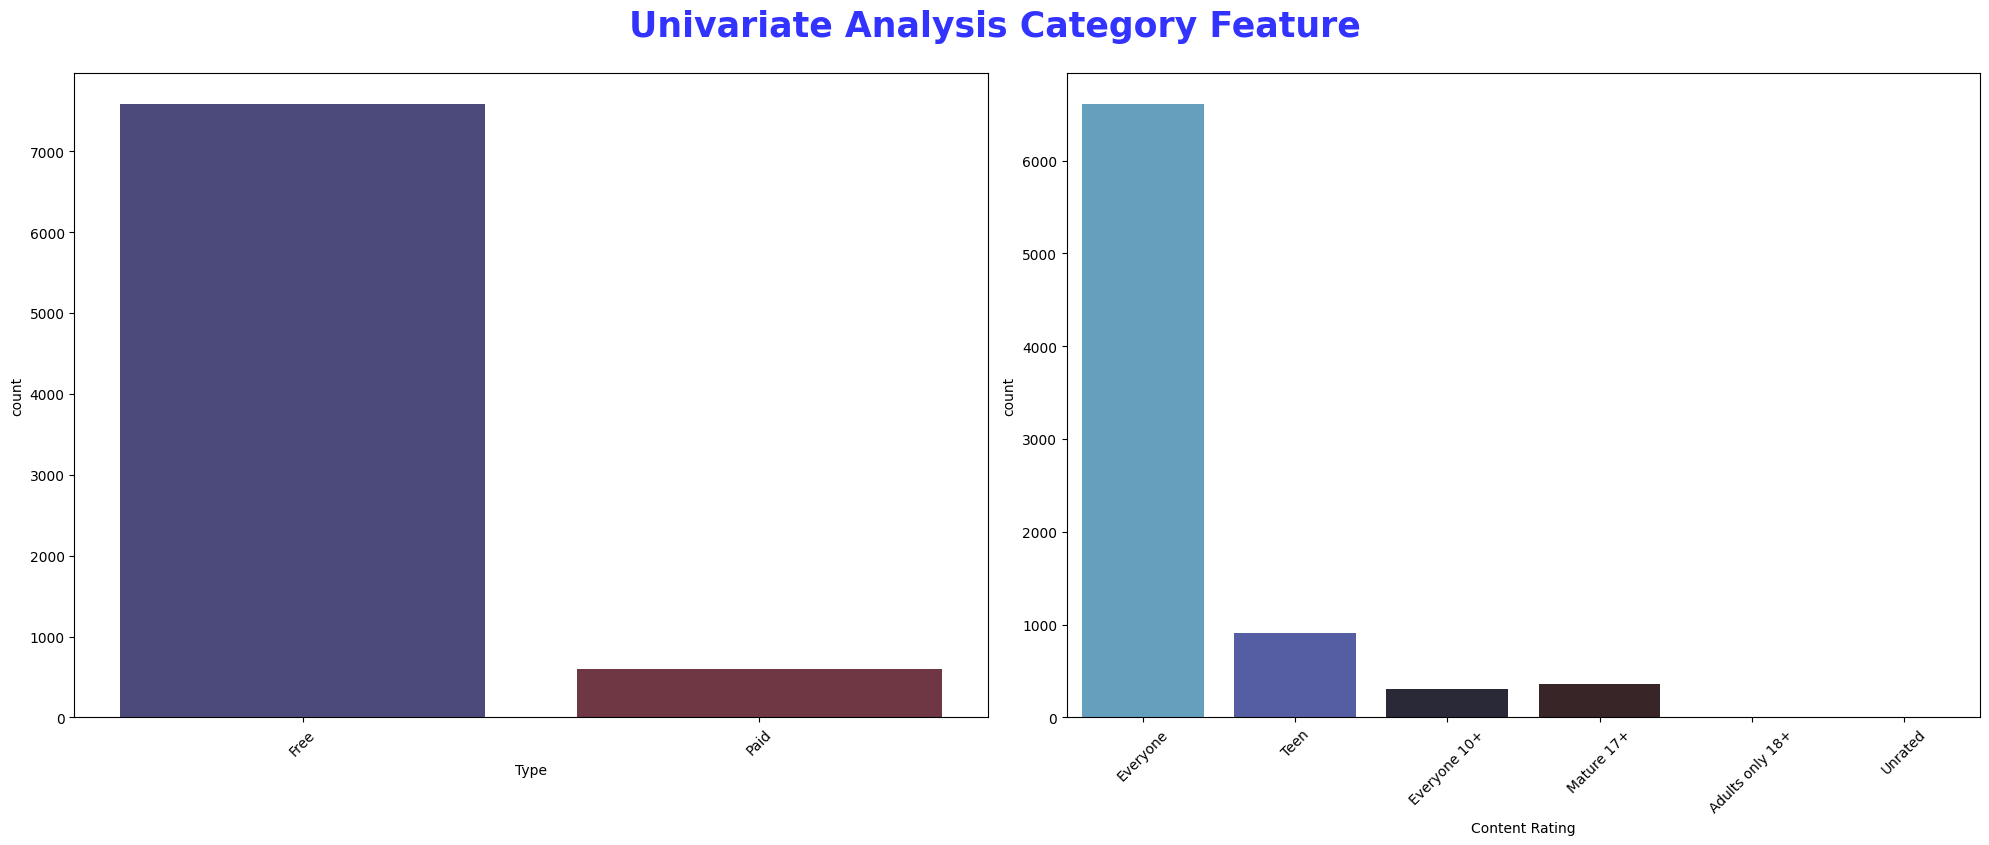

In [34]:
# Data Visualization on Categorical Features
plt.figure(figsize=(20,15))
category = ['Type' , 'Content Rating']
ob = plt.suptitle('Univariate Analysis Category Feature', fontsize = 25 , fontweight = 'bold' , alpha = 0.8 , y = 1.)
ob.set_color('b')
for i in range(len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x = df[category[i]],palette='icefire')
    plt.xlabel(category[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

# Q1. Which is the most top 10 popular app category?

In [35]:
df['Category'].value_counts()

Category
FAMILY                 1607
GAME                    912
TOOLS                   717
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: count, dtype: int64

In [36]:
cat = pd.DataFrame(df['Category'].value_counts())

In [37]:
cat = cat.reset_index()

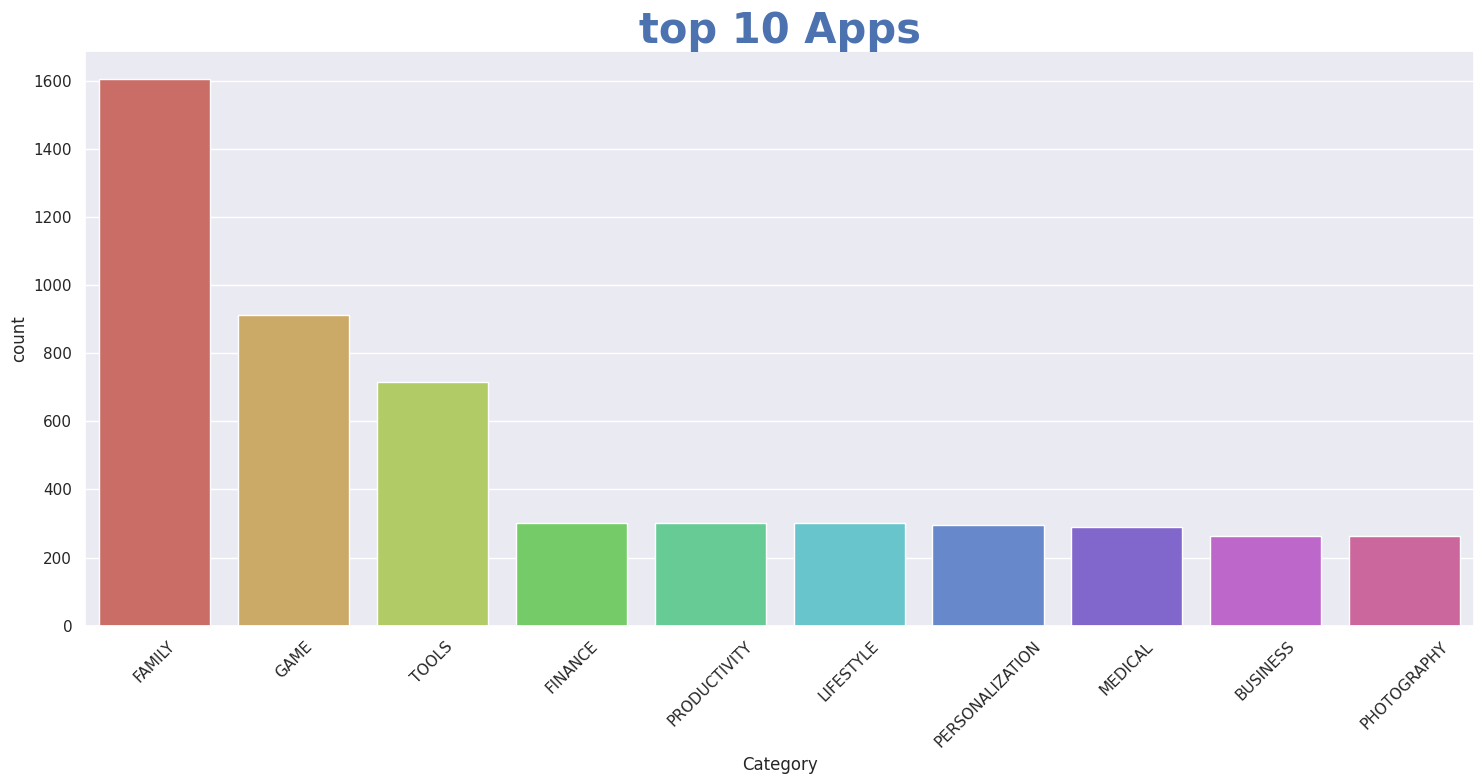

In [38]:
sns.set()
plt.figure(figsize=(15,8))
ob = sns.barplot(data = cat , x = cat.Category[:10] , y = cat['count'] , palette='hls')
ob.set_title('top 10 Apps' , fontdict={'fontsize':30,'fontweight':'bold','color':'b'})
plt.xticks(rotation = 45)
plt.tight_layout()

In [39]:
# df.to_csv('google_play_store_dataset.csv',index=False)

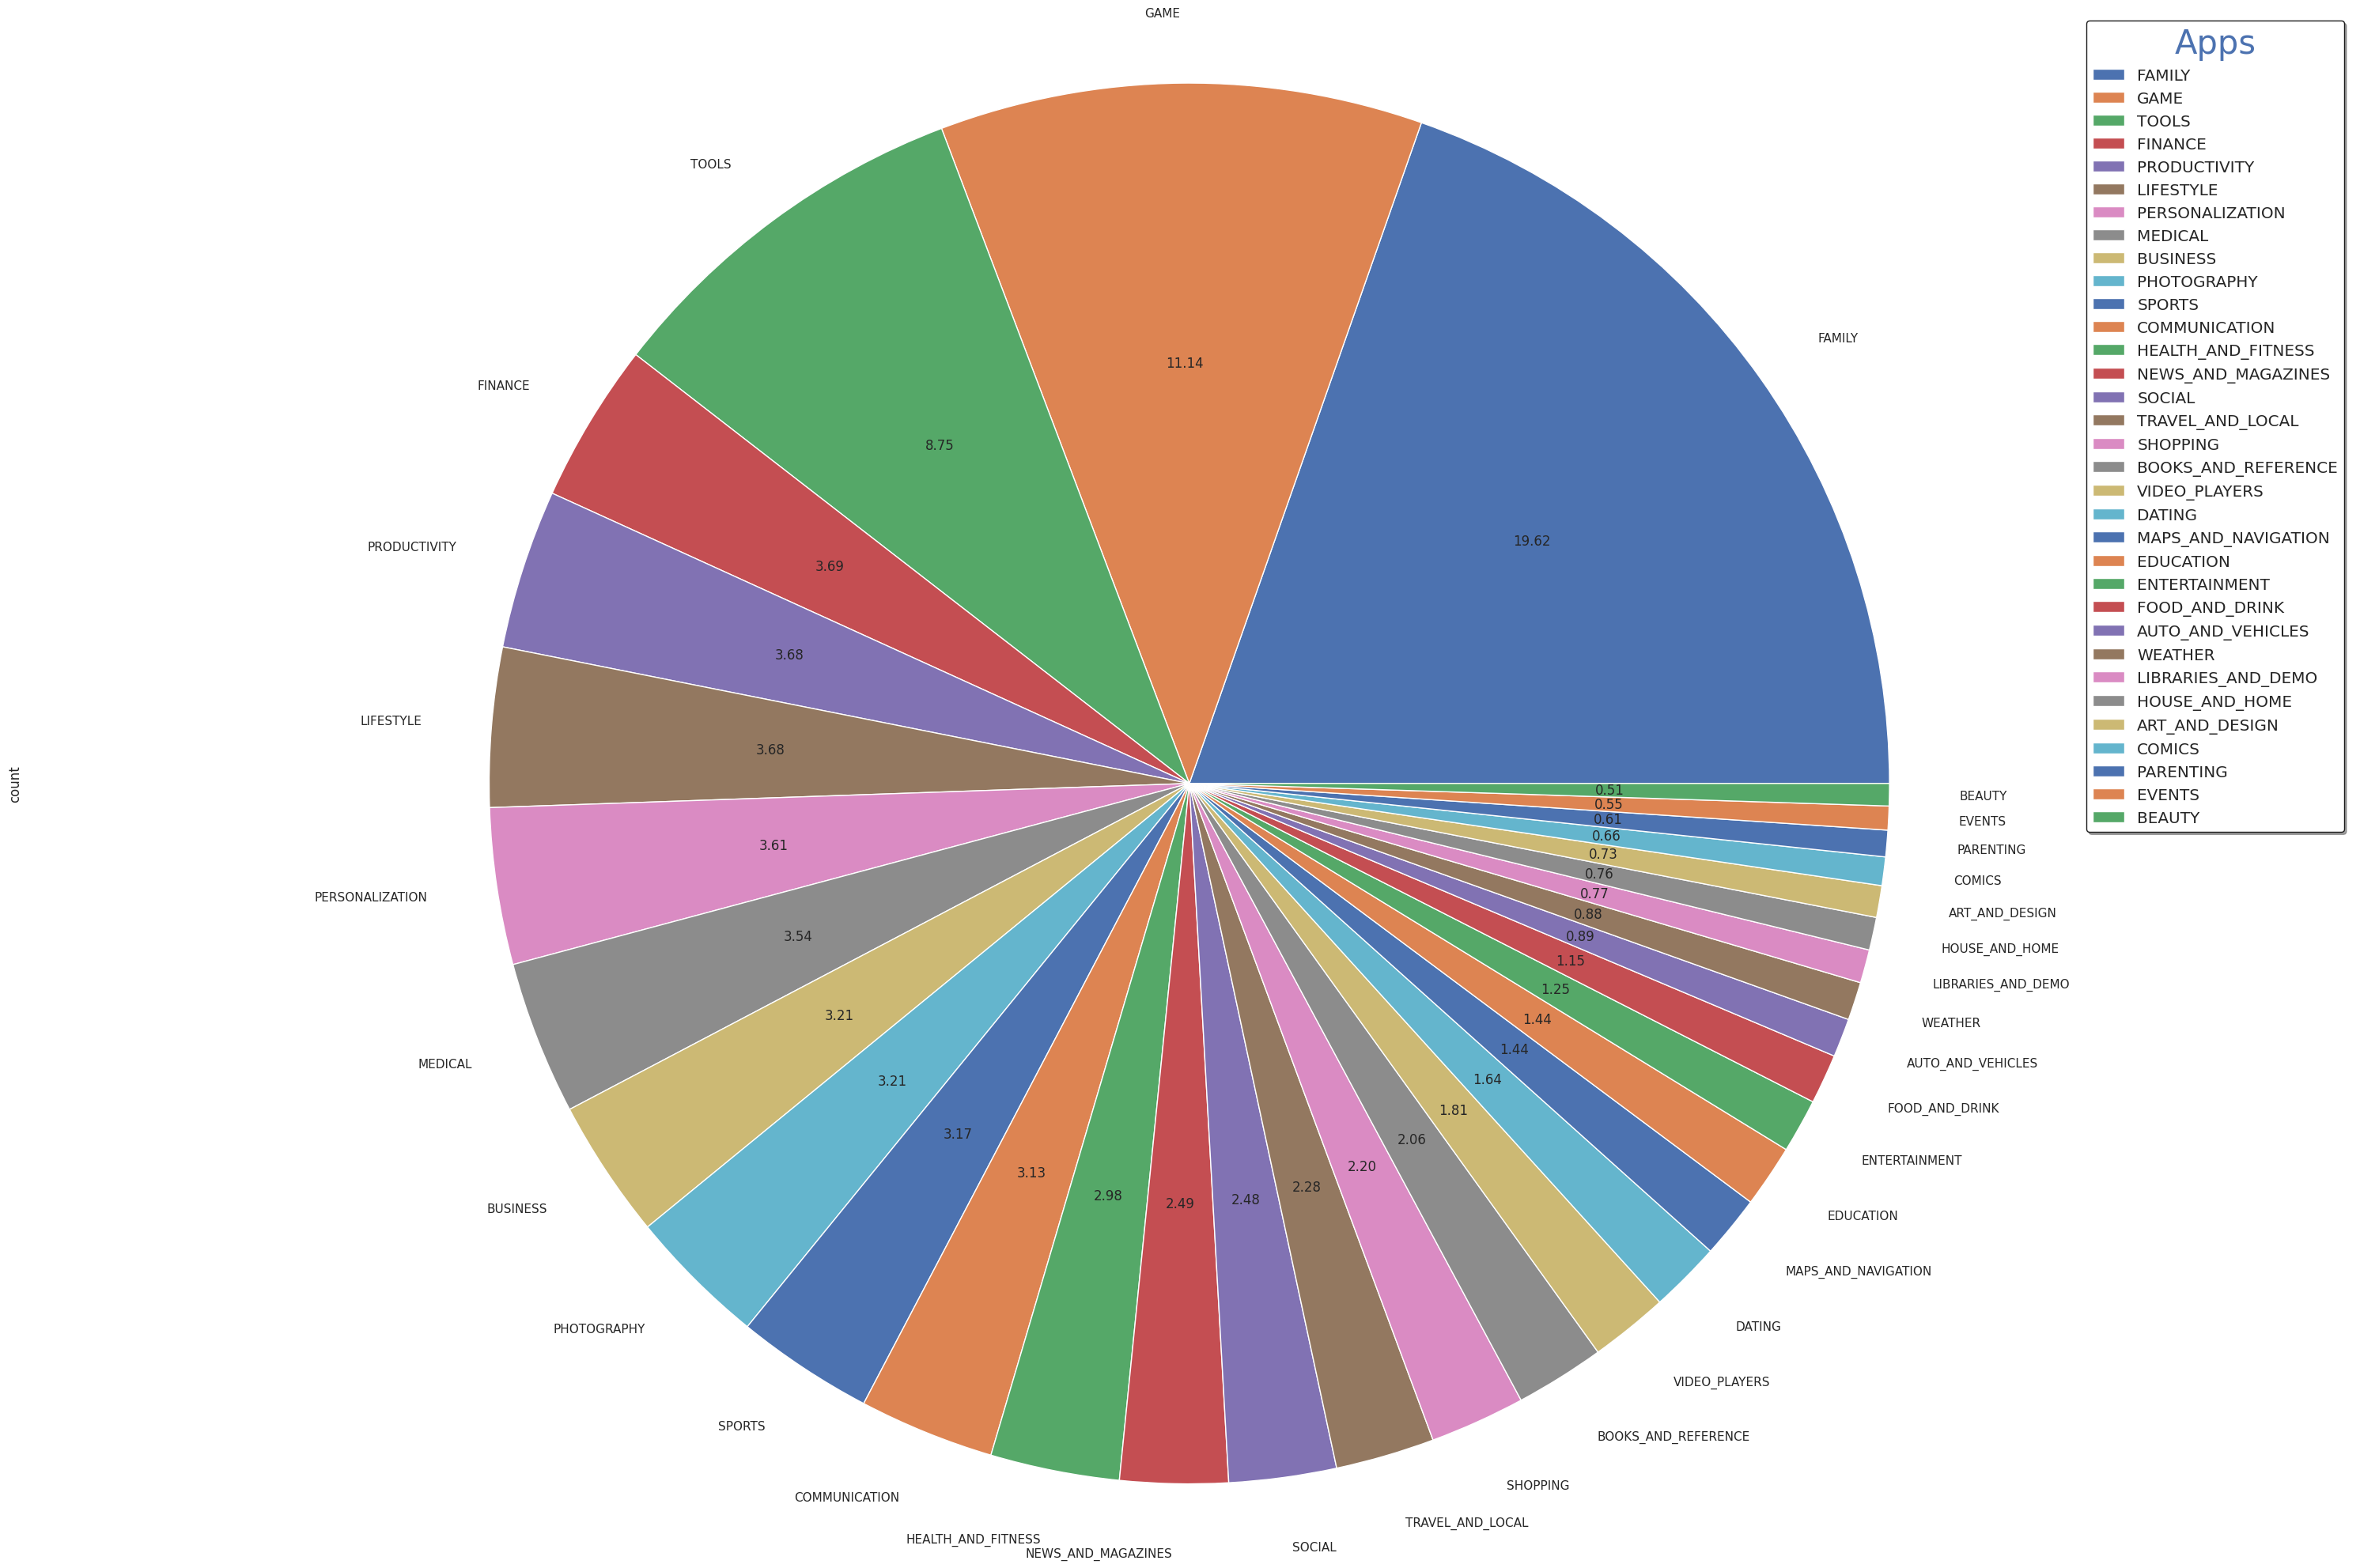

In [40]:
df.Category.value_counts().plot.pie(x = cat.count ,  y = cat.Category , autopct='%1.2f',figsize=(30,20))
plt.axis('equal')
plt.tight_layout()
t = plt.legend(title = 'Apps',shadow=True,facecolor='w',edgecolor='k' , fontsize = 'large' , title_fontsize = 30)
c = t.get_title()
c.set_color('b')

# Internal Assignments
- Q1 Which Category has largest number of installation?
- Q2 What are the top 5 install Apps in each popular Categories?
- Q3 How many apps are there on google play store which get 5 ratings?

In [41]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


- **Q1 Which Category has largest number of installation?**

In [42]:
category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

In [43]:
category_installs

Category
GAME                   13878762717
COMMUNICATION          11038241530
TOOLS                   7999224500
PRODUCTIVITY            5793070180
SOCIAL                  5487841475
PHOTOGRAPHY             4649143130
FAMILY                  4427429590
VIDEO_PLAYERS           3926797200
TRAVEL_AND_LOCAL        2894859300
NEWS_AND_MAGAZINES      2369110650
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665791655
PERSONALIZATION         1532341930
SHOPPING                1400331540
HEALTH_AND_FITNESS      1144006220
SPORTS                  1096431465
BUSINESS                 697018120
LIFESTYLE                503741120
MAPS_AND_NAVIGATION      503267560
FINANCE                  455312400
WEATHER                  361096500
EDUCATION                352852000
FOOD_AND_DRINK           211677750
DATING                   140912410
ART_AND_DESIGN           114228100
HOUSE_AND_HOME            97082000
AUTO_AND_VEHICLES         53129800
LIBRARIES_AND_DEMO        51083000
COMICS     

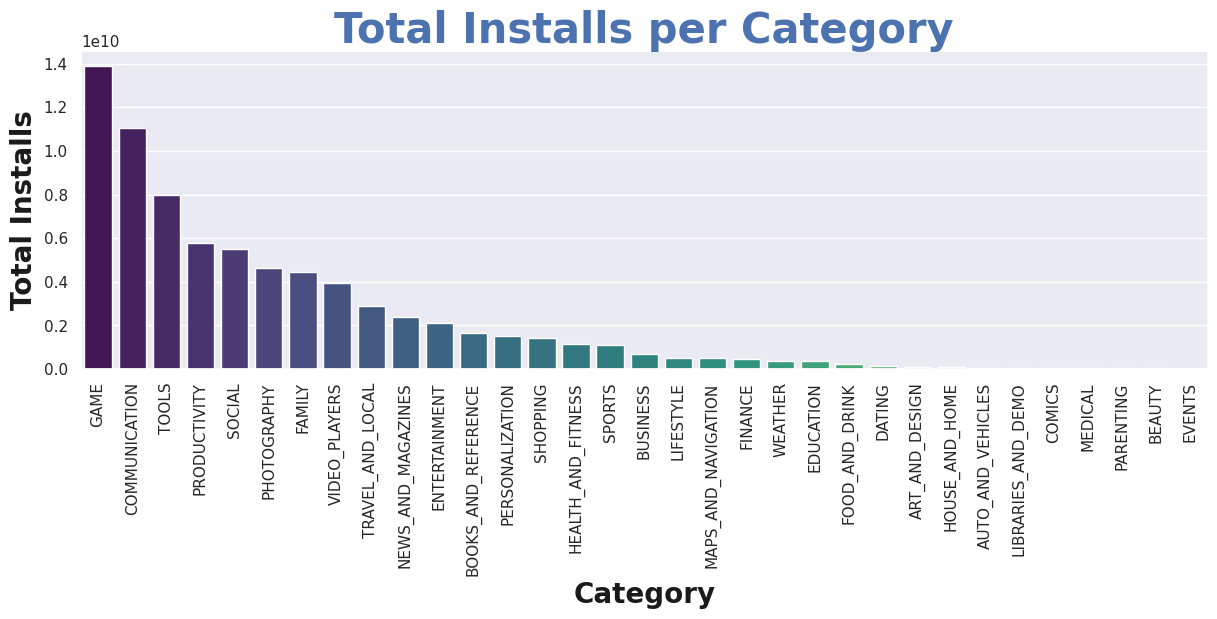

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_installs.index, y=category_installs.values, palette="viridis")
plt.xticks(rotation=90) 
plt.tight_layout()
plt.xlabel("Category", fontdict={'fontsize':20,'fontweight':'bold','color':'k'})
plt.ylabel("Total Installs", fontdict={'fontsize':20,'fontweight':'bold','color':'k'})
plt.title("Total Installs per Category", fontdict={'fontsize':30,'fontweight':'bold','color':'b'})
plt.show()

- **Q2 What are the top 5 install Apps in each popular Categories?**

In [45]:
top_categories = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5).index
top_apps = df[df['Category'].isin(top_categories)]
top_apps = top_apps.groupby('Category').apply(lambda x: x.nlargest(5, 'Installs')).reset_index(drop=True)
top_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,year
0,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,3,8,2018
2,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
3,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,2,8,2018
4,Hangouts,COMMUNICATION,4.0,3419249,NaN,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,21,7,2018


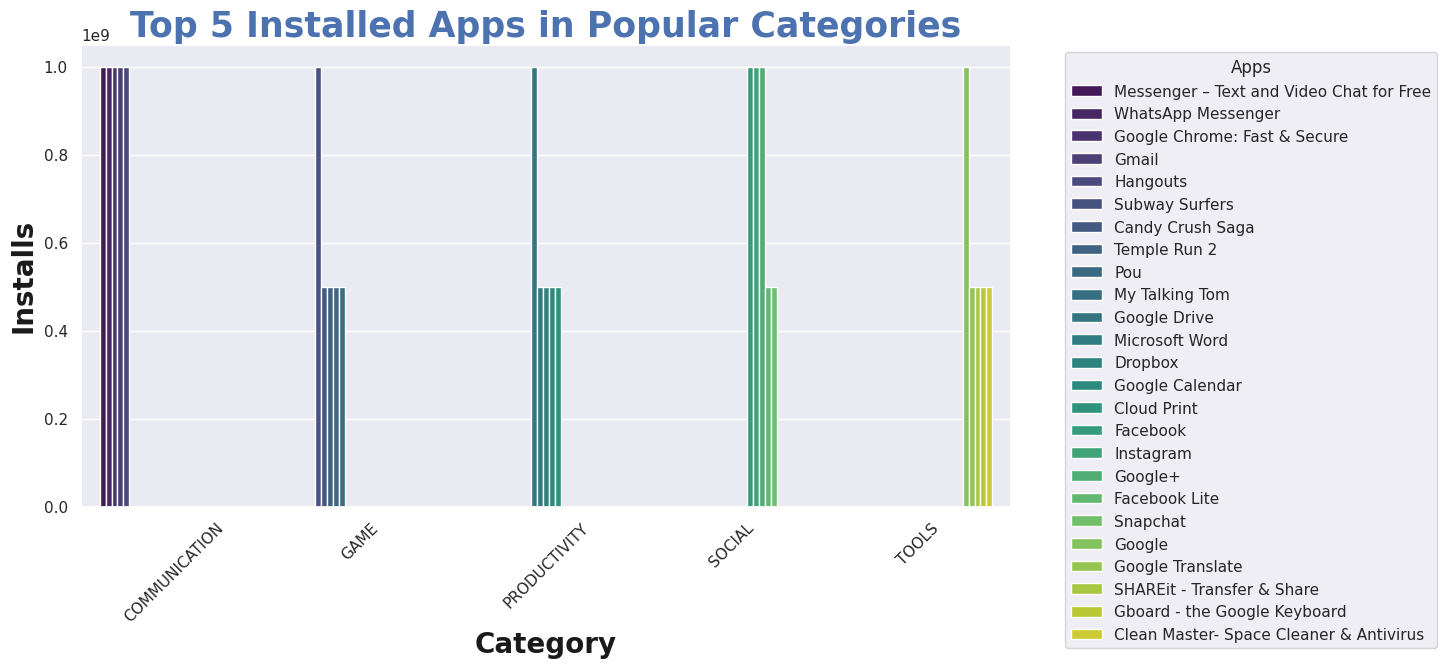

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Category", y="Installs", hue="App", data=top_apps, palette="viridis")

plt.xlabel("Category",fontdict={'fontsize':20,'fontweight':'bold','color':'k'})
plt.ylabel("Installs",fontdict={'fontsize':20,'fontweight':'bold','color':'k'})
plt.title("Top 5 Installed Apps in Popular Categories",fontdict={'fontsize':25,'fontweight':'bold','color':'b'})
plt.legend(title="Apps", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.xticks(rotation=45)
plt.show()

 - **Q3 How many apps are there on google play store which get 5 ratings?**

In [47]:
five_star_apps = df[df['Rating'] == 5.0][['App','Rating']]

In [48]:
five_star_apps.head()

,App,Rating
329,Hojiboy Tojiboyev Life Hacks,5.0
612,American Girls Mobile Numbers,5.0
615,Awake Dating,5.0
633,Spine- The dating app,5.0
636,Girls Live Talk - Free Text and Video Chat,5.0


In [49]:
five_star_count = five_star_apps['App'].count()

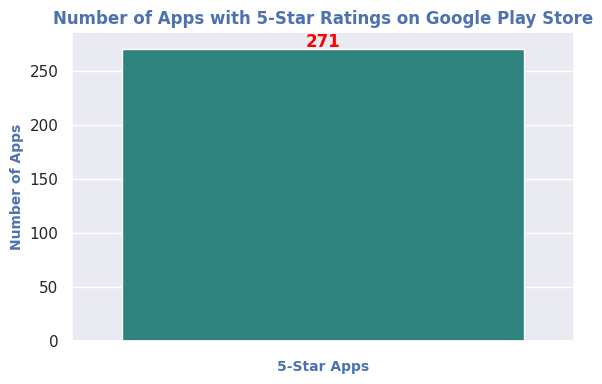

In [50]:
plt.figure(figsize=(6, 4))
sns.barplot(y=[five_star_count], palette="viridis")

plt.ylabel("Number of Apps",fontdict={'fontsize':10,'fontweight':'bold','color':'b'})
plt.xlabel("5-Star Apps",fontdict={'fontsize':10,'fontweight':'bold','color':'b'})

plt.title("Number of Apps with 5-Star Ratings on Google Play Store",fontdict={'fontsize':12,'fontweight':'bold','color':'b'})
plt.ylim(0, five_star_count + 15)  # Adjust y-axis for better visibility
plt.tight_layout()

plt.text(0, five_star_count + 1, str(five_star_count), ha='center', fontsize=12, color='red', fontweight='bold')
plt.show()